# Задание 1

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

In [251]:
X, y = make_regression(n_samples=100, n_features=2, n_targets=1)

ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
n = X.shape[1]
W = np.array([1, 1, 0.5])
X = X.T

In [252]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [253]:
def gradient_descent(X, y, iterations, alpha):
    err_history, iters = [], []    
    
    W_calced = np.copy(W)
    for iteration in range(iterations):
        y_pred = np.dot(W_calced, X)
        err = calc_mse(y, y_pred)
        err_history.append(err)
        iters.append(iteration)
        W_calced -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))        
    return W_calced, err, err_history, iters

In [254]:
def stochastic_gradient_descent(X, y, iterations, qty_in_batch, alpha):
    err_history, iters = [], []  
    
    W_calced = np.random.randn(X.shape[0])
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1

    for iteration in range(1, iterations+1):
        # эпоха обучения
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W_calced, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W_calced -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        err_history.append(err)
        iters.append(iteration)
    return W_calced, err, err_history, iters

In [257]:
number_of_iterations = 2000
w, err, err_hist, iters = gradient_descent(X, y, number_of_iterations, 1e-4)
w_s, err_s, err_hist_s, iters_s = stochastic_gradient_descent(X, y, number_of_iterations, 30, 1e-4)
print(w, err)
print(w_s, err_s)

[-1.65069246e-05  1.84515849e+01  2.09350431e+01] 2.0640338397867845e-07
[ 0.22682908 18.18291434 20.67175005] 0.18805503932445627


In [196]:
w_s, err_s, err_hist_s, iters_s = stochastic_gradient_descent(X, y, 10000, 30, 1e-4)
print(w_s, err_s)

[4.27847089e-03 2.43721297e+01 8.55353525e+01] 5.2366203447777654e-05


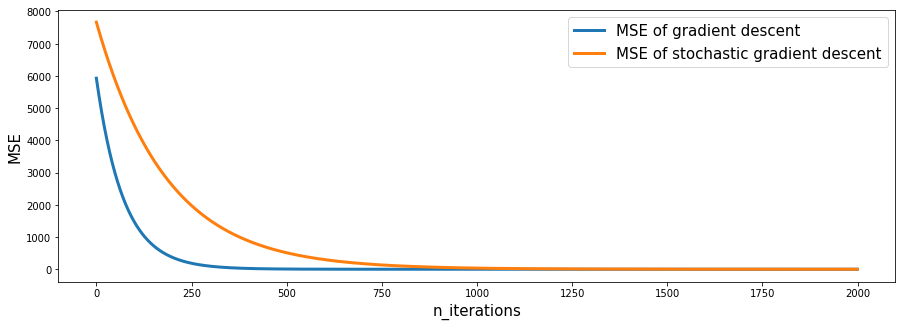

In [181]:
fig = plt.figure(figsize=(15,5))
    
plt.plot(iters, err_hist, err_hist_s, linewidth=3)
plt.xlabel("n_iterations", size=15)
plt.ylabel("MSE", size=15)
plt.legend(["MSE of gradient descent", "MSE of stochastic gradient descent"], loc="best", fontsize=15)

### обычный градиентный спуск сходится бысрее

# Задание 2

In [226]:
def calc_mse_l2(y, y_pred, _lambda, w):
    err = np.mean((y - y_pred)**2) + _lambda * (np.sqrt(w[0]**2 + w[1]**2 + w[2]**2))
    return err

In [260]:
def gradient_descent_l2(X, y, iterations, alpha, _lambda):
    W_calced = np.copy(W)
    for iteration in range(iterations):
        y_pred = np.dot(W_calced, X)
        err = calc_mse_l2(y, y_pred, _lambda, W_calced)
        W_calced -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)) + _lambda * W)        
    return W_calced, err

In [262]:
gradient_descent_l2(X, y, 2000, 1e-4, 0)

(array([-1.65069246e-05,  1.84515849e+01,  2.09350431e+01]),
 2.0640338397867845e-07)

In [264]:
gradient_descent_l2(X, y, 2000, 1e-4, 0.01)

(array([-1.47011952, 16.49337005, 20.48790021]), 5.7425335725708315)

In [267]:
gradient_descent_l2(X, y, 100000, 1e-4, 0.001)

(array([-0.14701263, 18.25626917, 20.89022274]), 0.08252375635294039)

In [269]:
gradient_descent_l2(X, y, 1000000, 1e-4, 0.001)

(array([-0.14701263, 18.25626917, 20.89022274]), 0.08252375635294039)

### В данном случае в регуляризации нет необходимости, однако можно сделать вывод, что при наличии L2 регуляризации, решение сходится к менее точному значению (и сходится хуже) 

# Задание 3

In [271]:
def calc_mse_l1(y, y_pred, _lambda, w):
    err = np.mean((y - y_pred)**2) + _lambda * (np.abs(w[0]) + np.abs(w[1]) + np.abs(w[2]))
    return err

In [272]:
def gradient_descent_l1(X, y, iterations, alpha, _lambda):
    W_calced = np.copy(W)
    for iteration in range(iterations):
        y_pred = np.dot(W_calced, X)
        err = calc_mse_l2(y, y_pred, _lambda, W_calced)
        W_calced -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)) + _lambda * np.sign(W))        
    return W_calced, err

In [274]:
gradient_descent_l1(X, y, 2000, 1e-4, 0)

(array([-1.65069246e-05,  1.84515849e+01,  2.09350431e+01]),
 2.0640338397867845e-07)

In [277]:
gradient_descent_l1(X, y, 2000, 1e-4, 0.01)

(array([-1.37958837, 16.57827226, 19.68989066]), 7.005987394258669)

In [282]:
gradient_descent_l1(X, y, 100000, 1e-4, 0.001)

(array([-0.13795882, 18.26476166, 20.81042054]), 0.09516087668468194)

In [281]:
gradient_descent_l1(X, y, 1000000, 1e-4, 0.001)

(array([-0.13795882, 18.26476166, 20.81042054]), 0.09516087668468194)

### Тоже самое можно сказать про регуляризацию L1